[[1.03533399 1.45914293]] 56.0419737779817
[[ 31.70700585]
 [ 68.77759598]
 [ 62.5623823 ]
 [ 71.54663223]
 [ 87.23092513]
 [ 78.21151827]
 [ 79.64197305]
 [ 59.17148932]
 [ 75.3312423 ]
 [ 71.30087989]
 [ 55.16567715]
 [ 82.47884676]
 [ 62.00892325]
 [ 75.39287043]
 [ 81.43619216]
 [ 60.72360244]
 [ 82.89250373]
 [ 97.37989686]
 [ 48.84715332]
 [ 56.87721319]
 [ 83.87856466]
 [118.5912173 ]
 [ 57.25181946]
 [ 51.39174408]
 [ 75.38065167]
 [ 74.76556403]
 [ 95.45505292]
 [ 95.22936602]
 [ 79.05240617]
 [ 83.43207142]
 [ 63.35879032]
 [ 41.4128853 ]
 [ 76.61734128]
 [ 96.76956643]
 [ 74.08413012]
 [ 66.58814441]
 [ 77.76848242]
 [ 50.71958891]
 [ 62.12457082]
 [ 60.81024665]
 [ 52.68298337]
 [ 58.56982472]
 [ 82.90598149]
 [ 61.4247098 ]
 [115.2441528 ]
 [ 45.57058882]
 [ 54.0840548 ]
 [ 87.99445276]
 [ 52.72549438]
 [ 93.57611869]
 [ 80.16627545]
 [ 65.10171157]
 [ 65.56230126]
 [ 65.28088692]
 [ 73.43464155]
 [ 71.13972786]
 [ 79.10282968]
 [ 86.52053844]
 [ 84.74269781]
 [ 59.3588502

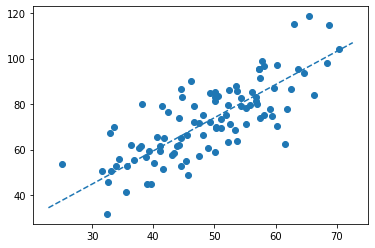

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# from numpy import genfromtxt
# this is your 'bad' data set from github
my_data = np.genfromtxt('data.csv', delimiter=',')

def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        # you don't need the extra loop - this can be vectorize
        # making it much faster and simpler
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

# notice small alpha value
alpha = 0.0001
iters = 1000

# here x is columns
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
#X = np.hstack([ones, X]) # hstack Stack arrays in sequence horizontally (column wise)

# theta is a row vector
theta = np.array([[1.0, 1.0]])

# y is a columns vector
y = my_data[:, 1].reshape(-1,1)
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)
print(y)
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')